In [61]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
import pickle

%matplotlib inline

In [2]:
df = pd.read_csv('bodyfat.csv')

In [3]:
df

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.corr()

Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853167  0.286053  0.672405  0.719496   
Ankle   -0.264890  0.265970 -0.105058  0.613685  0.264744  0.477892  0.482988   
Biceps  -0.487109  0.493271 -0.041162  0.800416  0.207816  0.731146  0.727907   
Forearm -0.351648  0.361387 -0.085056  0.630301  0.228649  0.623660  0.580173   
Wrist   -0.325716  0.346575  0.213531  0.729775  0.322065  0.744826  0.660162   

          Abdomen       Hip     Thigh      Knee     Ankle    Biceps   Forearm  \
Density -0.798955 -0.609331 -0.553091 -0.495040 -0.264890 -0.487109 -0.351648   
BodyFat  0.813432  0.625201  0.559608  0.508665  0.265970  0.493271  0.361387   
Age      0.230409 -0.050332 -0.200096  0.017516 -0.105058 -0.041162 -0.085056   
Weight   0.887995  0.940884  0.868694  0.853167  0.613685  0.800416  0.630301   
Height   0.087813  0.170394  0.148436  0.286053  0.264744  0.207816  0.228649   
Neck     0.754077  0.734958  0.695697  0.672405  0.477892  0.731146  0.623660   
Chest    0.915828  0.829420  0.729859  0.719496  0.482988  0.727907  0.580173   
Abdomen  1.000000  0.874066  0.766624  0.737179  0.453223  0.684983  0.503316   
Hip      0.874066  1.000000  0.896410  0.823473  0.558387  0.739273  0.545014   
Thigh    0.766624  0.896410  1.000000  0.799170  0.539797  0.761477  0.566842   
Knee     0.737179  0.823473  0.799170  1.000000  0.611608  0.678709  0.555898   
Ankle    0.453223  0.558387  0.539797  0.611608  1.000000  0.484855  0.419050   
Biceps   0.684983  0.739273  0.761477  0.678709  0.484855  1.000000  0.678255   
Forearm  0.503316  0.545014  0.566842  0.555898  0.419050  0.678255  1.000000   
Wrist    0.619832  0.630090  0.558685  0.664507  0.566195  0.632126  0.585588   

            Wrist  
Density -0.325716  
BodyFat  0.346575  
Age      0.213531  
Weight   0.729775  
Height   0.322065  
Neck     0.744826  
Chest    0.660162  
Abdomen  0.619832  
Hip      0.630090  
Thigh    0.558685  
Knee     0.664507  
Ankle    0.566195  
Biceps   0.632126  
Forearm  0.585588  
Wrist    1.000000

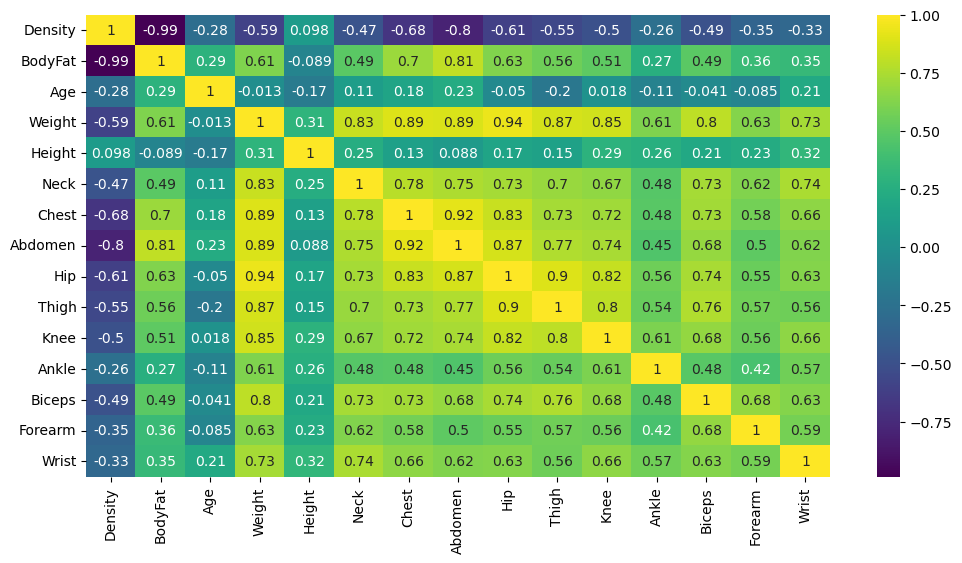

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True,cmap='viridis')

C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\107776459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


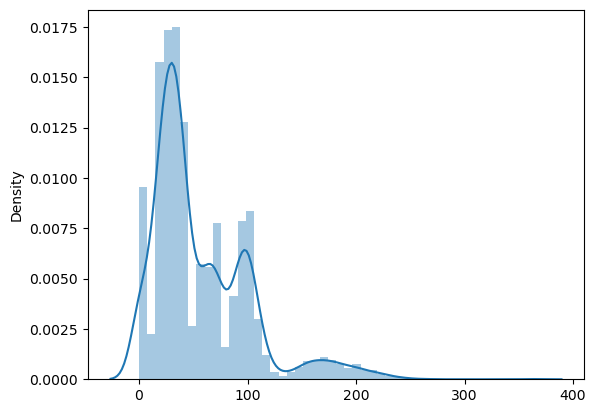

In [7]:
sns.distplot(df)

Distribution plots for Density feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

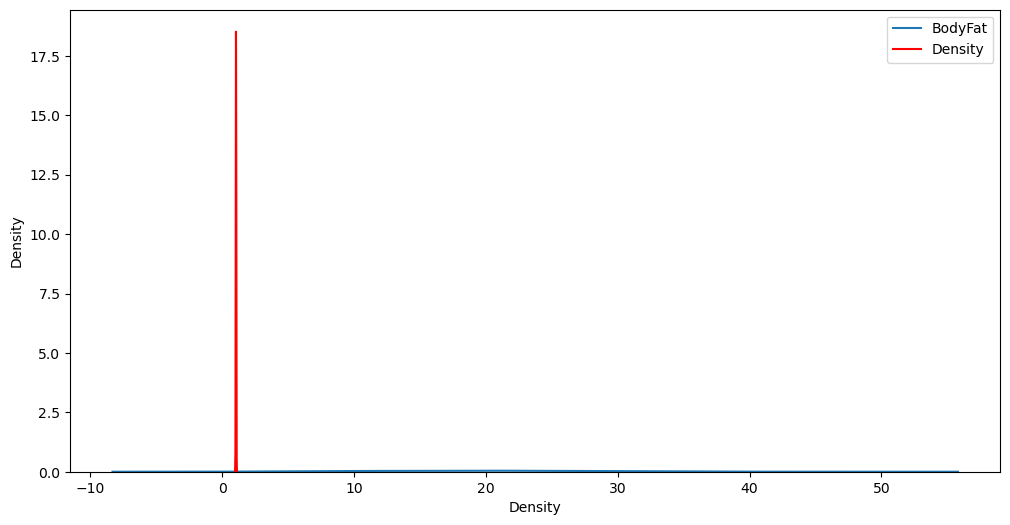

Distribution plots for BodyFat feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

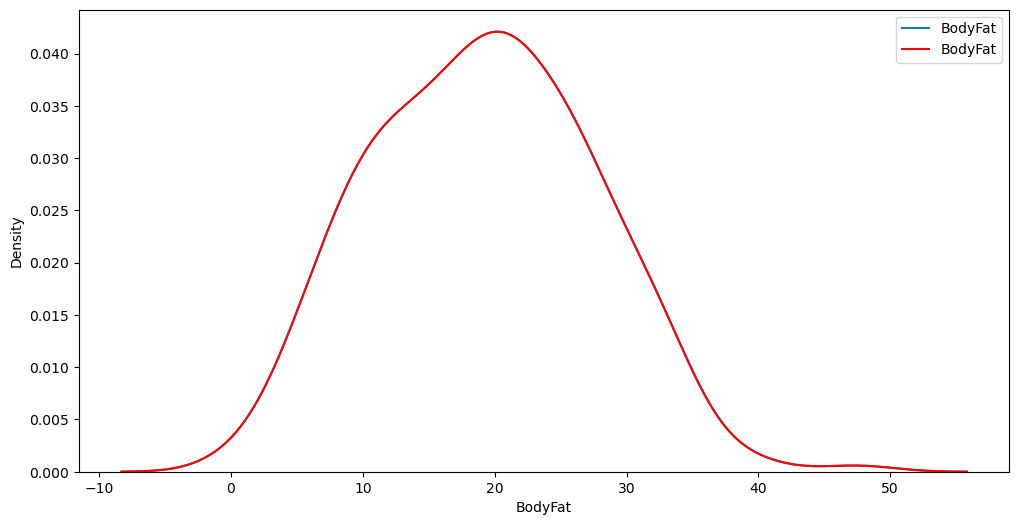

Distribution plots for Age feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

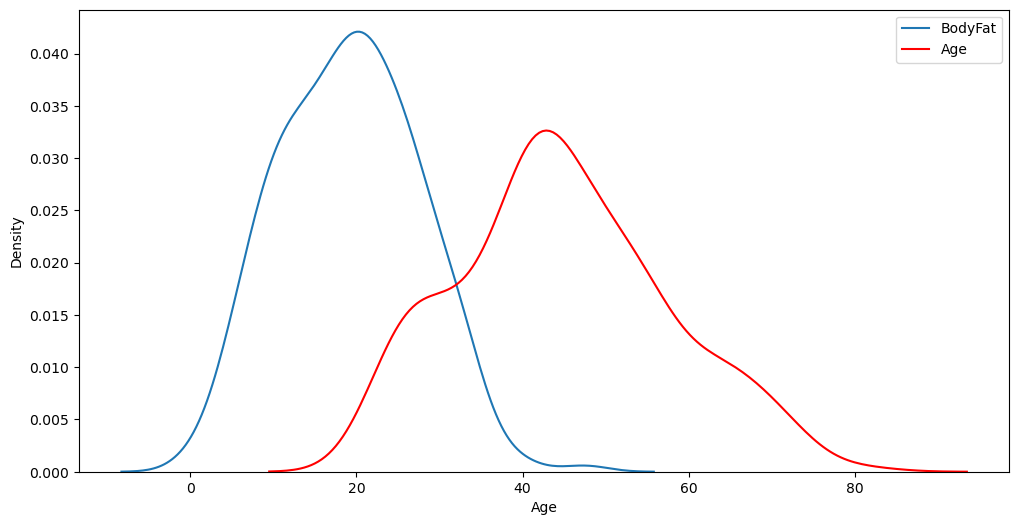

Distribution plots for Weight feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

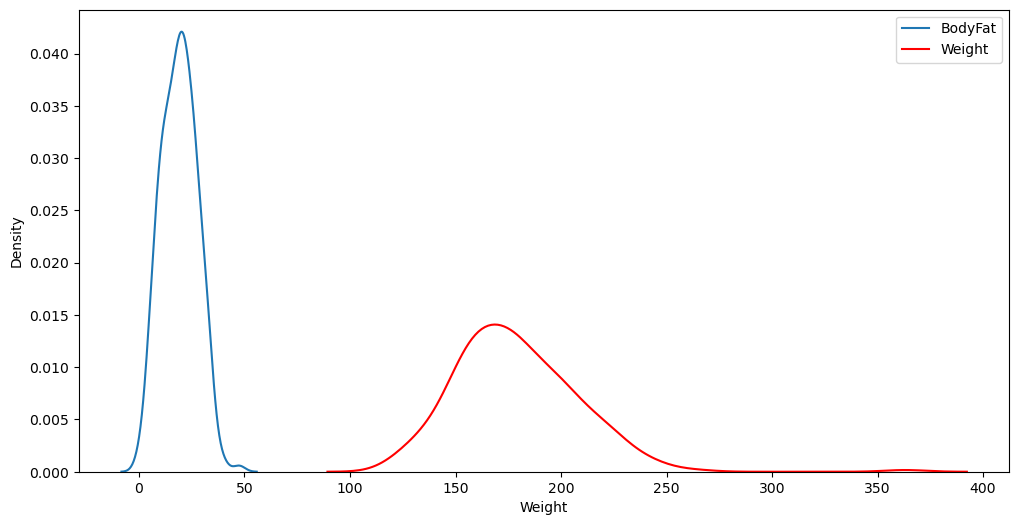

Distribution plots for Height feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

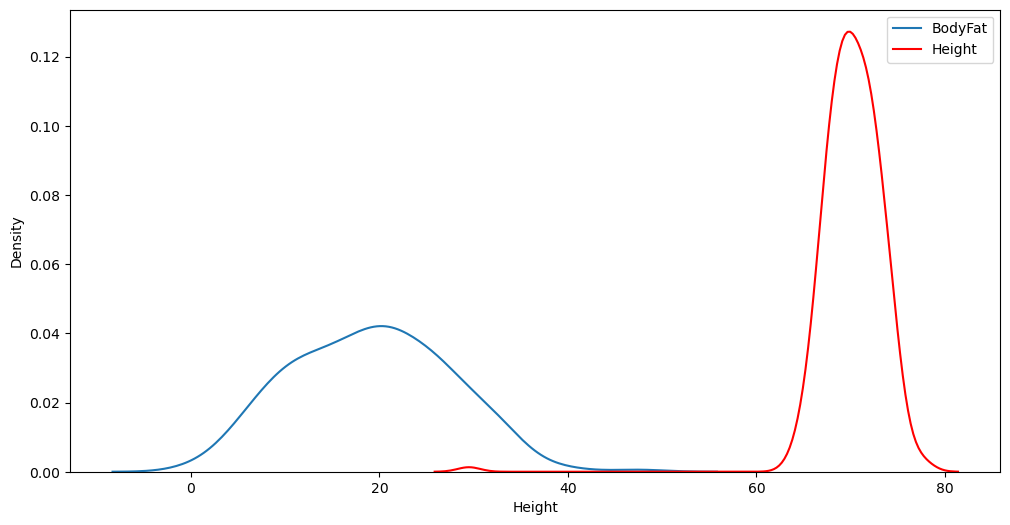

Distribution plots for Neck feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

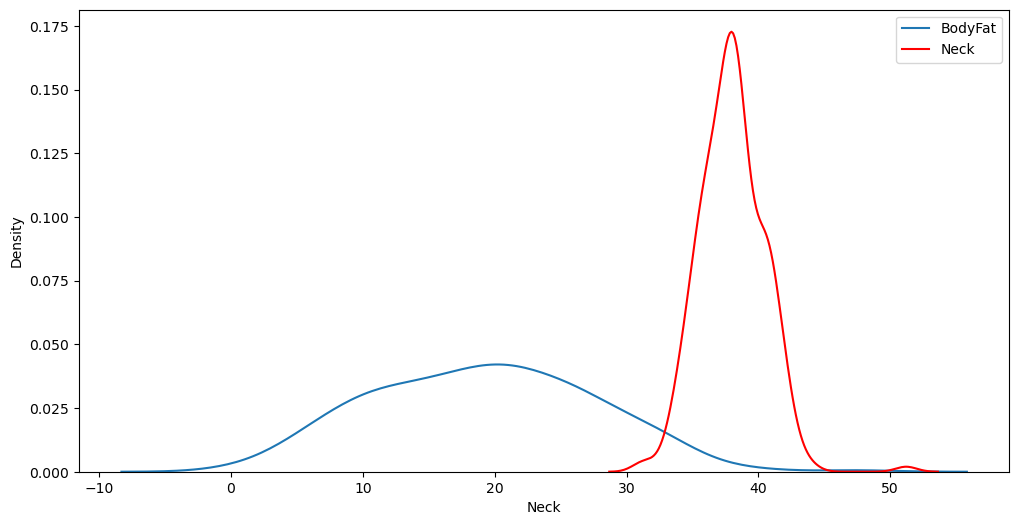

Distribution plots for Chest feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

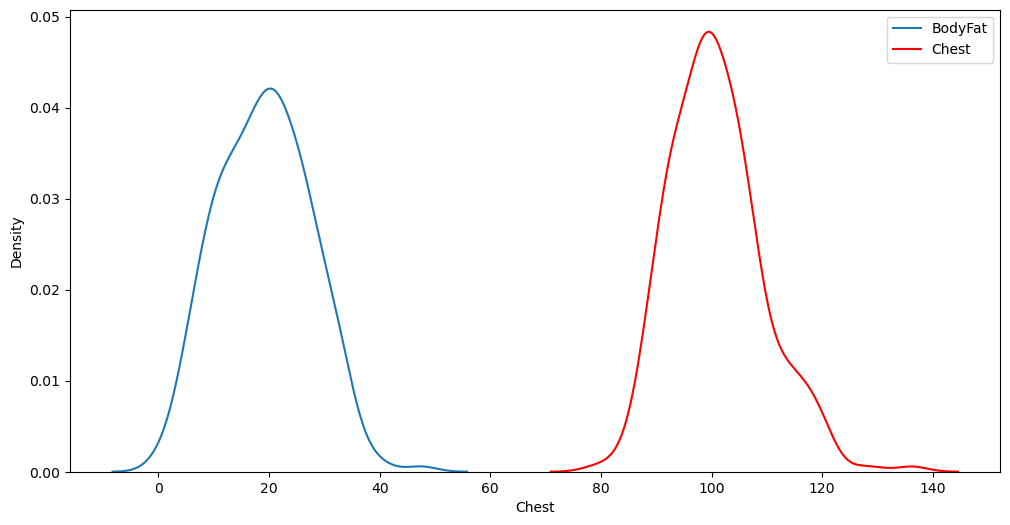

Distribution plots for Abdomen feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

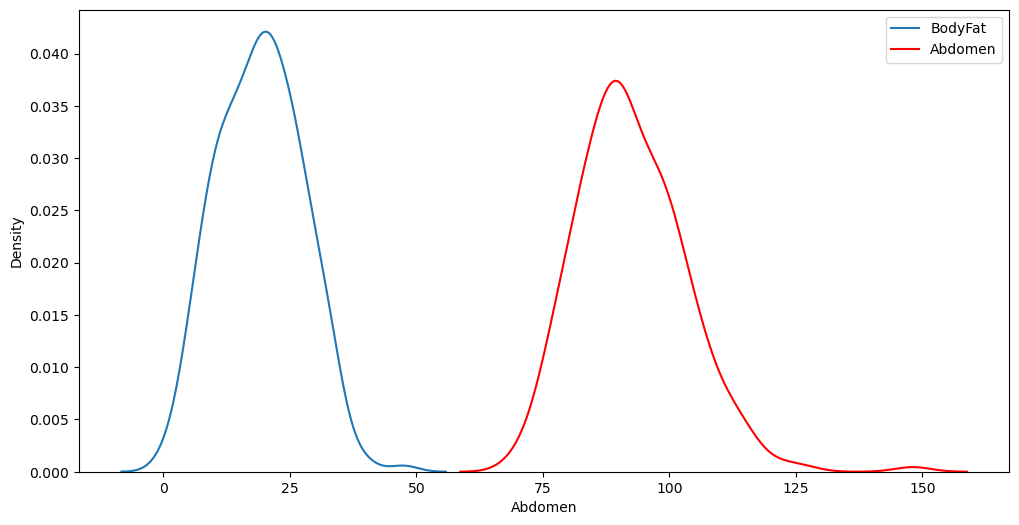

Distribution plots for Hip feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

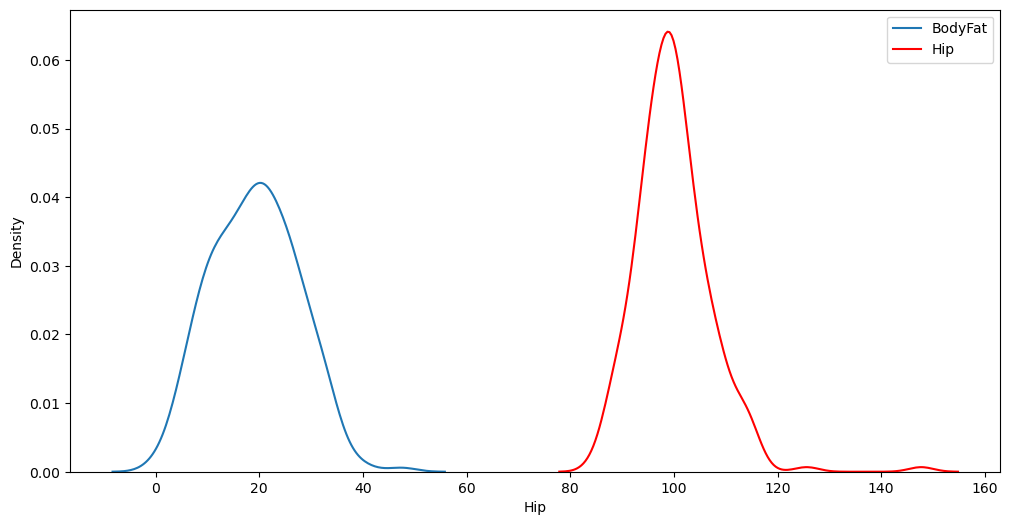

Distribution plots for Thigh feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

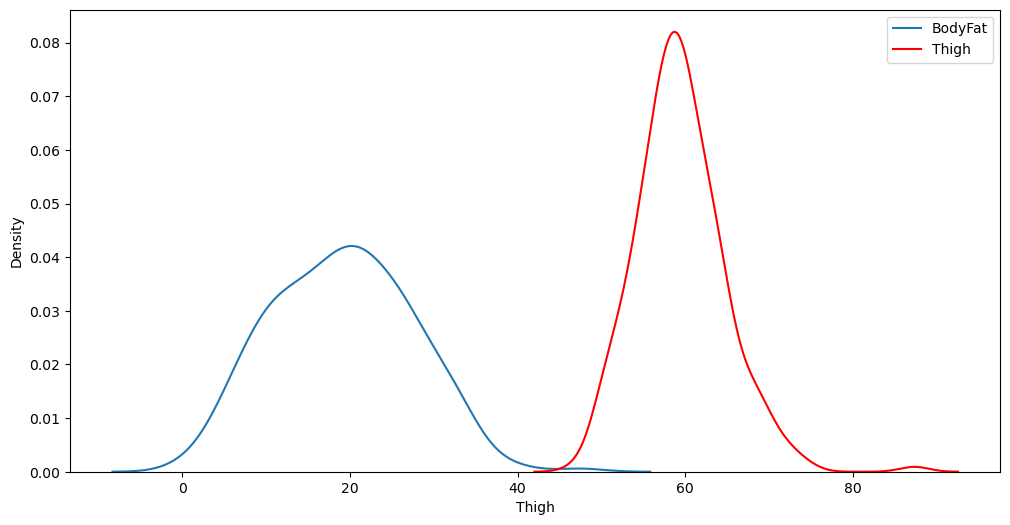

Distribution plots for Knee feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

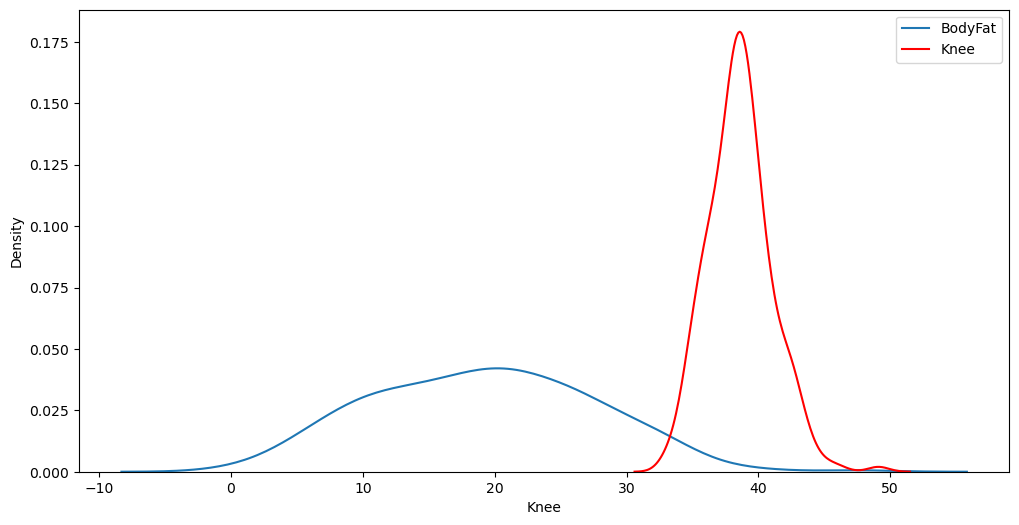

Distribution plots for Ankle feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

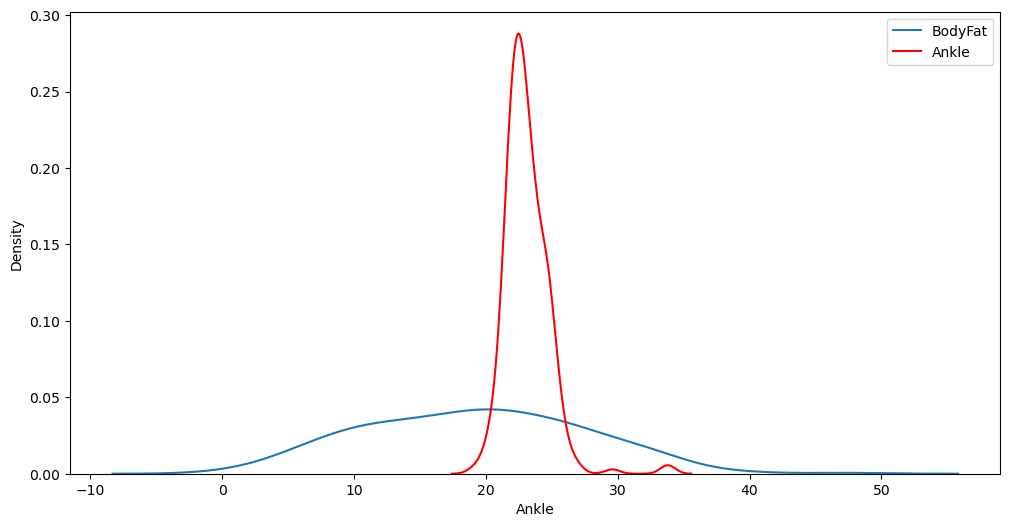

Distribution plots for Biceps feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

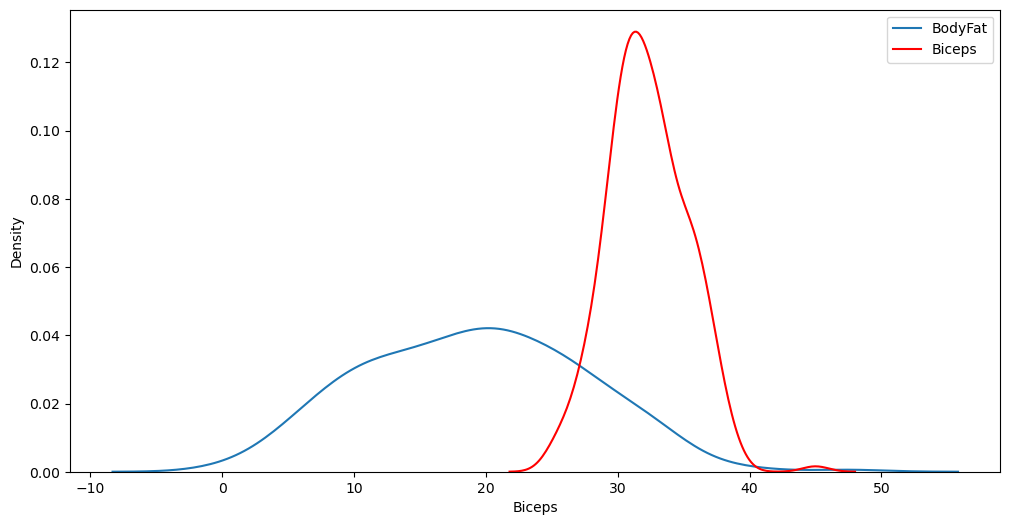

Distribution plots for Forearm feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

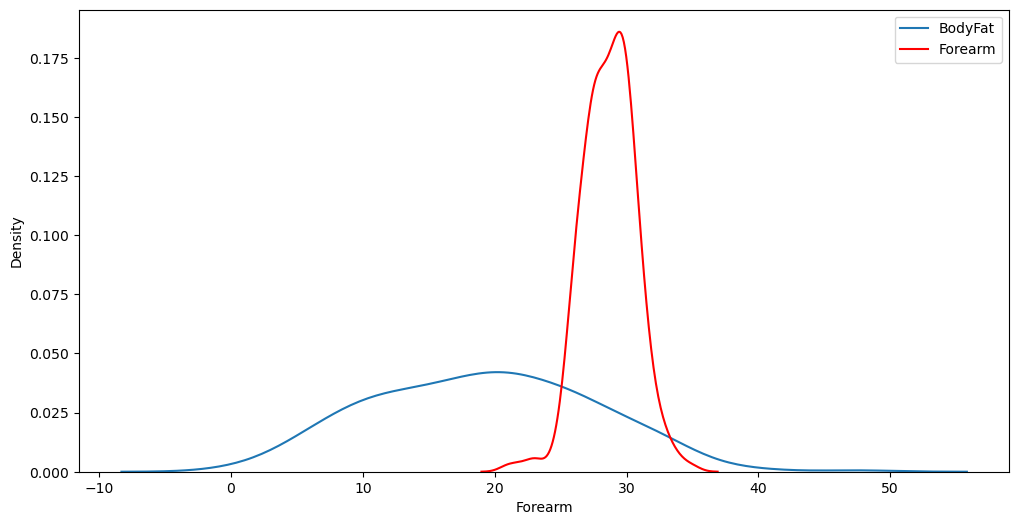

Distribution plots for Wrist feature


C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\173799047.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],

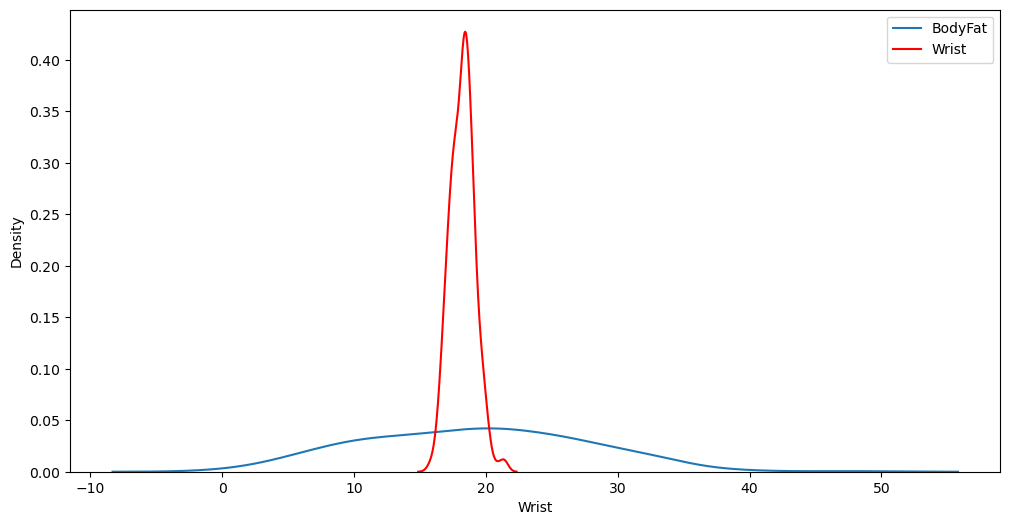

In [8]:
# checking relation of body-fat with all columns
def dist_plot(col):
    plt.figure(figsize=(12,6))
    sns.distplot(df['BodyFat'], hist=False, label='BodyFat')
    sns.distplot(df[col], color='red',  hist=False,label=col)
    plt.legend()
    plt.show()
    

cols = list(df.columns)

for i in cols:
    print(f"Distribution plots for {i} feature")
    dist_plot(i)
    

Distribution plots for the feature Density


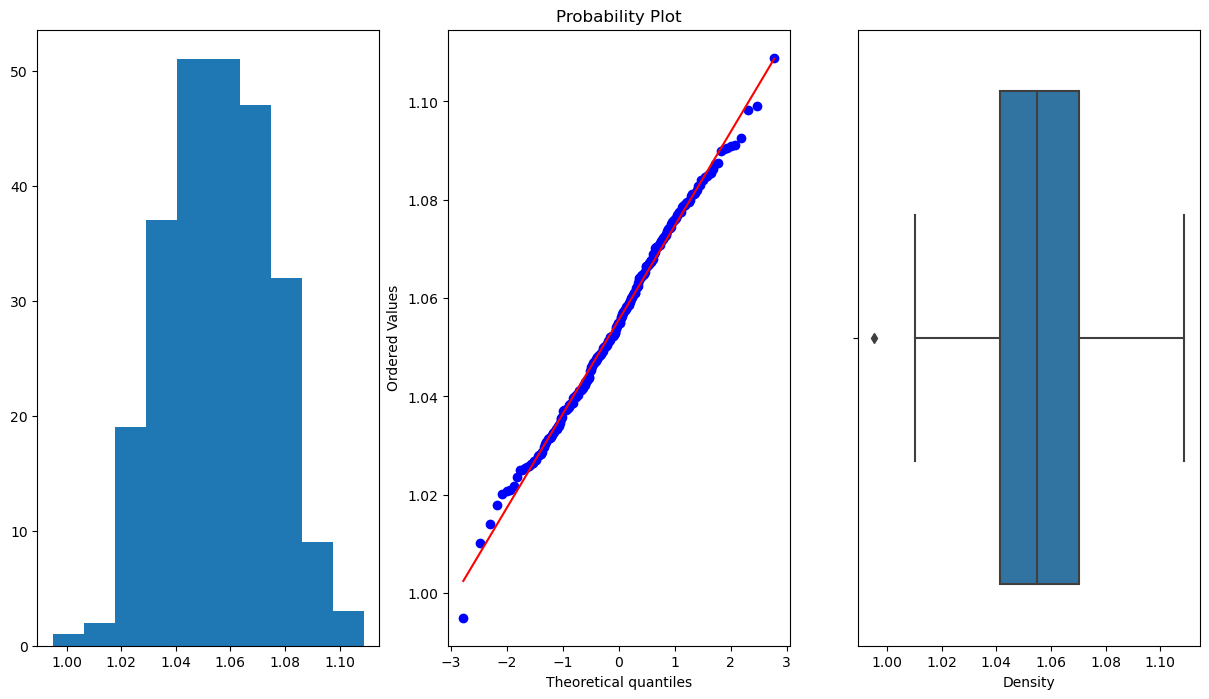

Distribution plots for the feature BodyFat


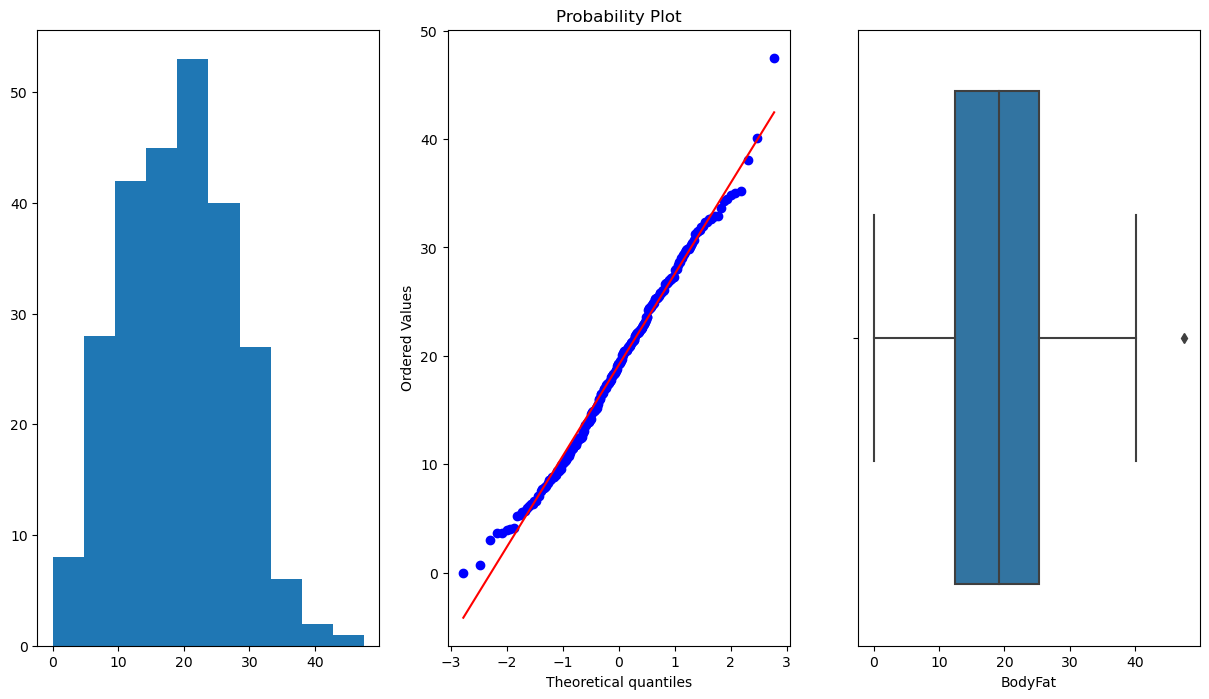

Distribution plots for the feature Age


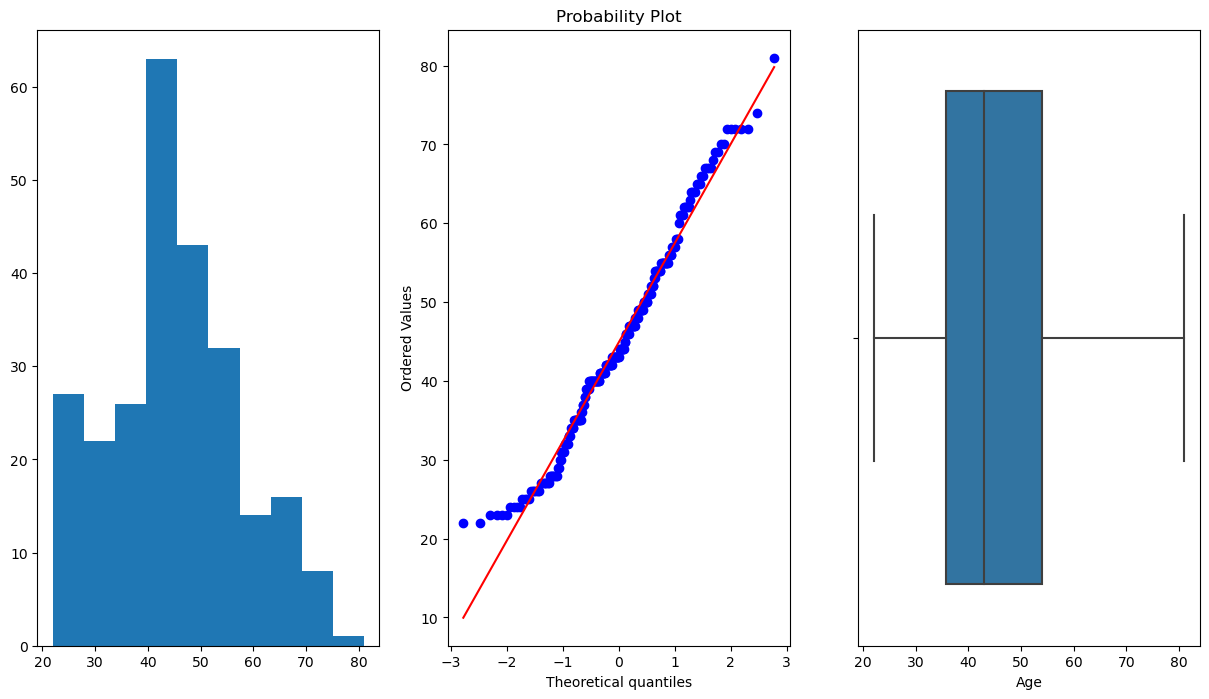

Distribution plots for the feature Weight


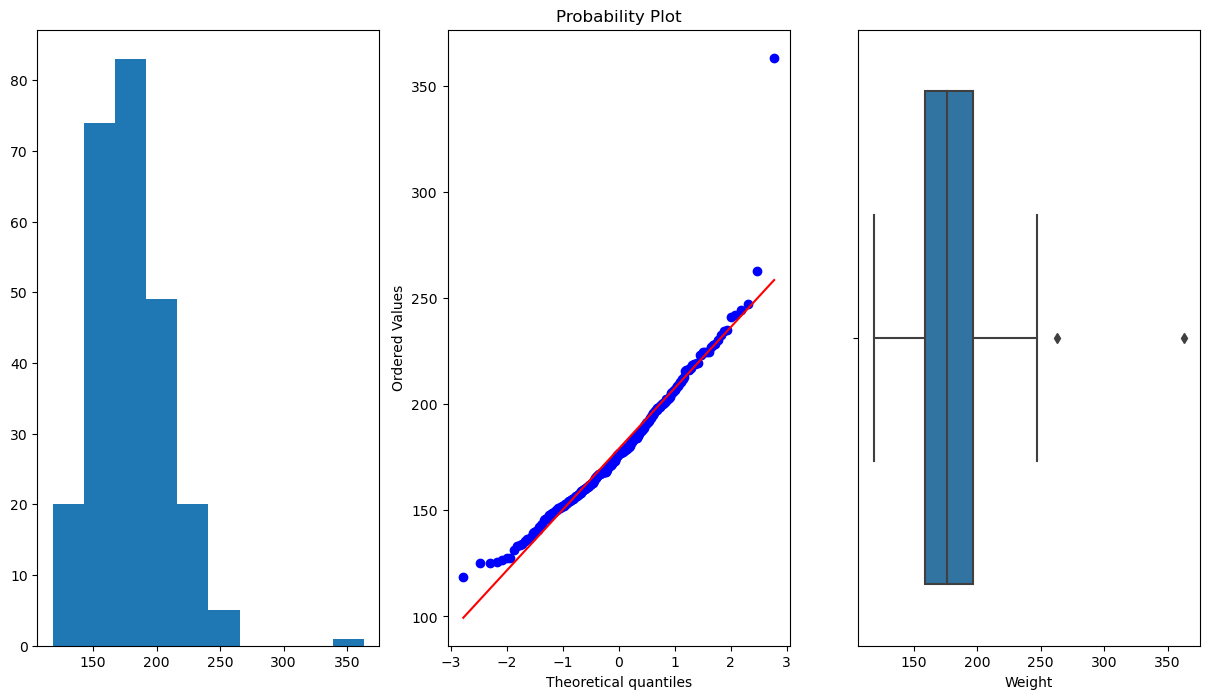

Distribution plots for the feature Height


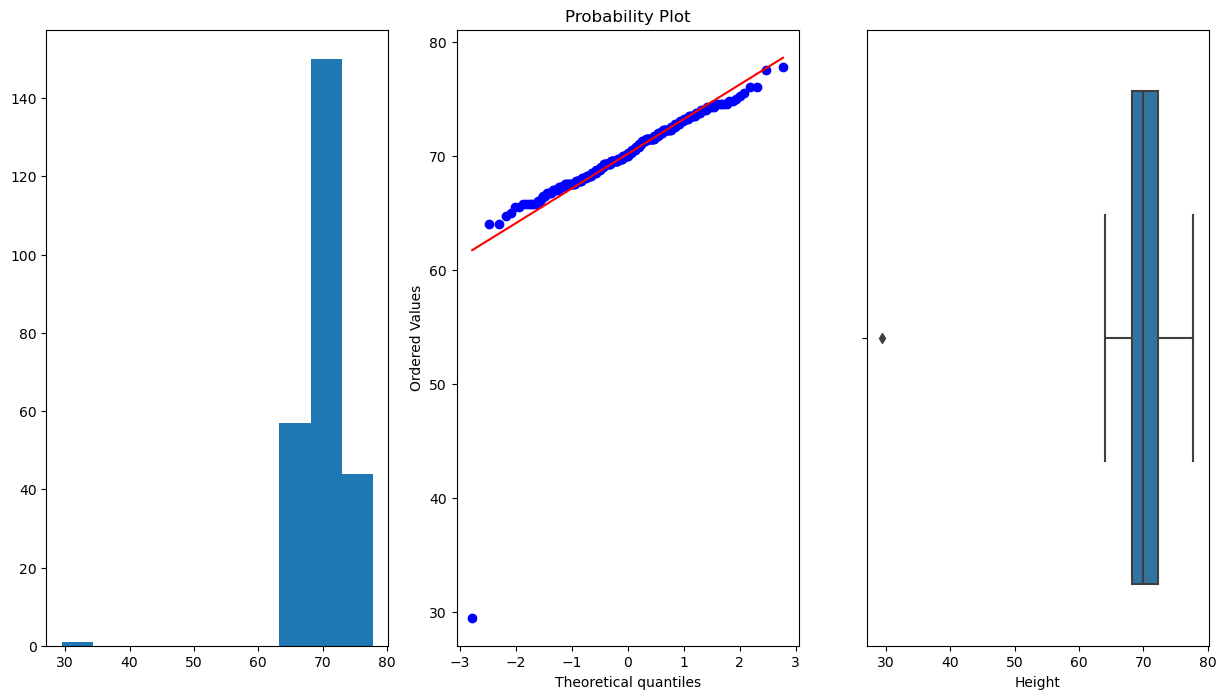

Distribution plots for the feature Neck


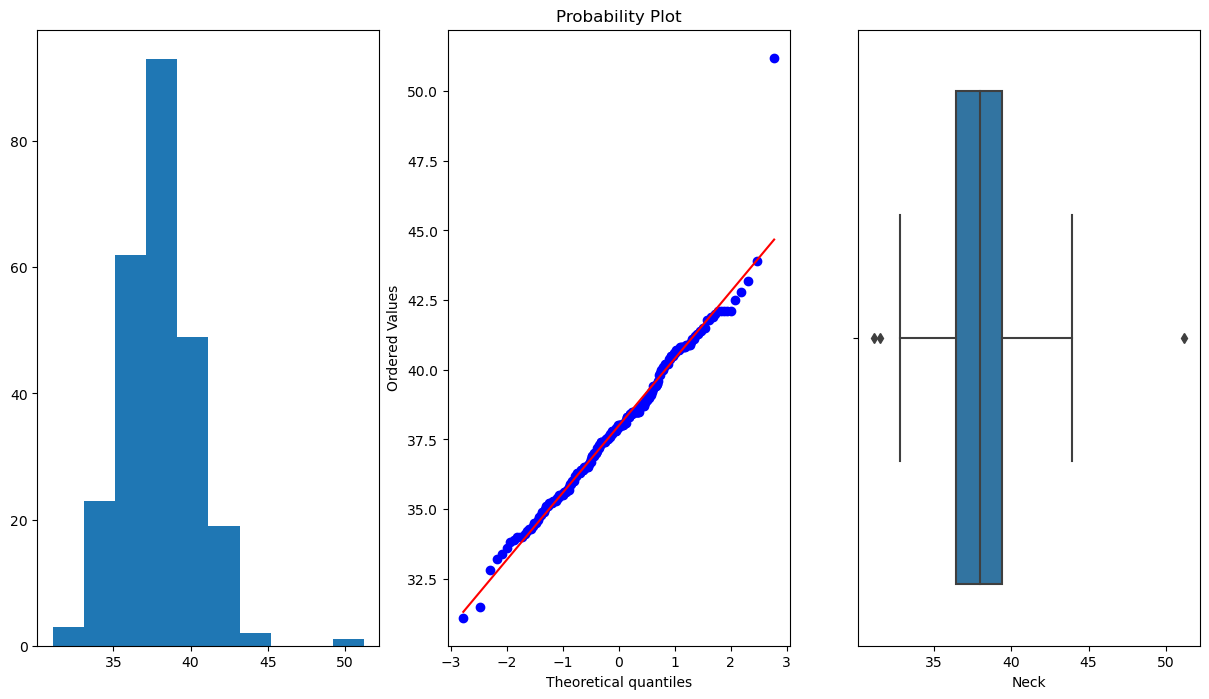

Distribution plots for the feature Chest


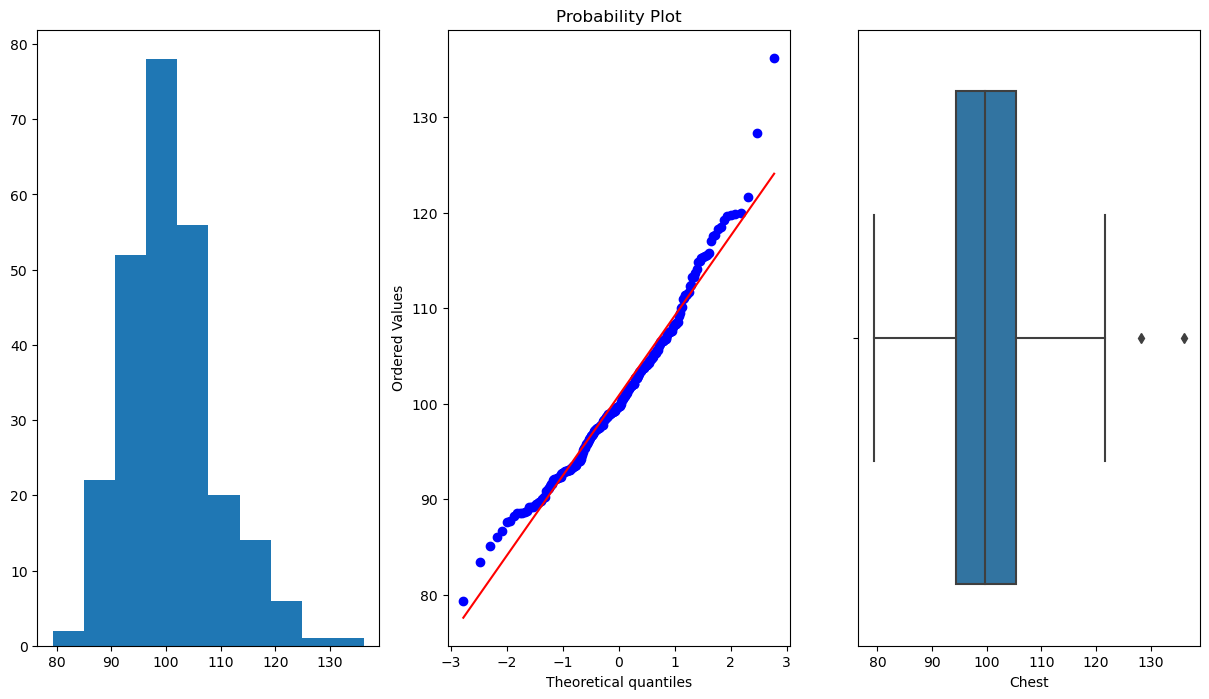

Distribution plots for the feature Abdomen


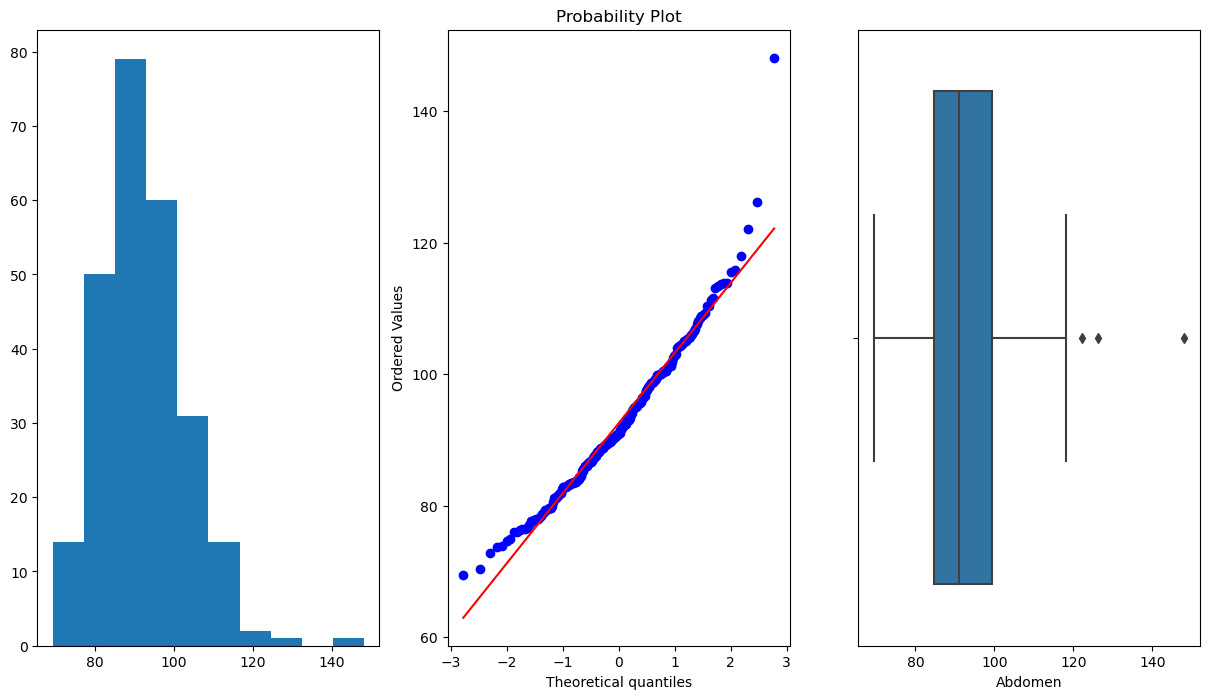

Distribution plots for the feature Hip


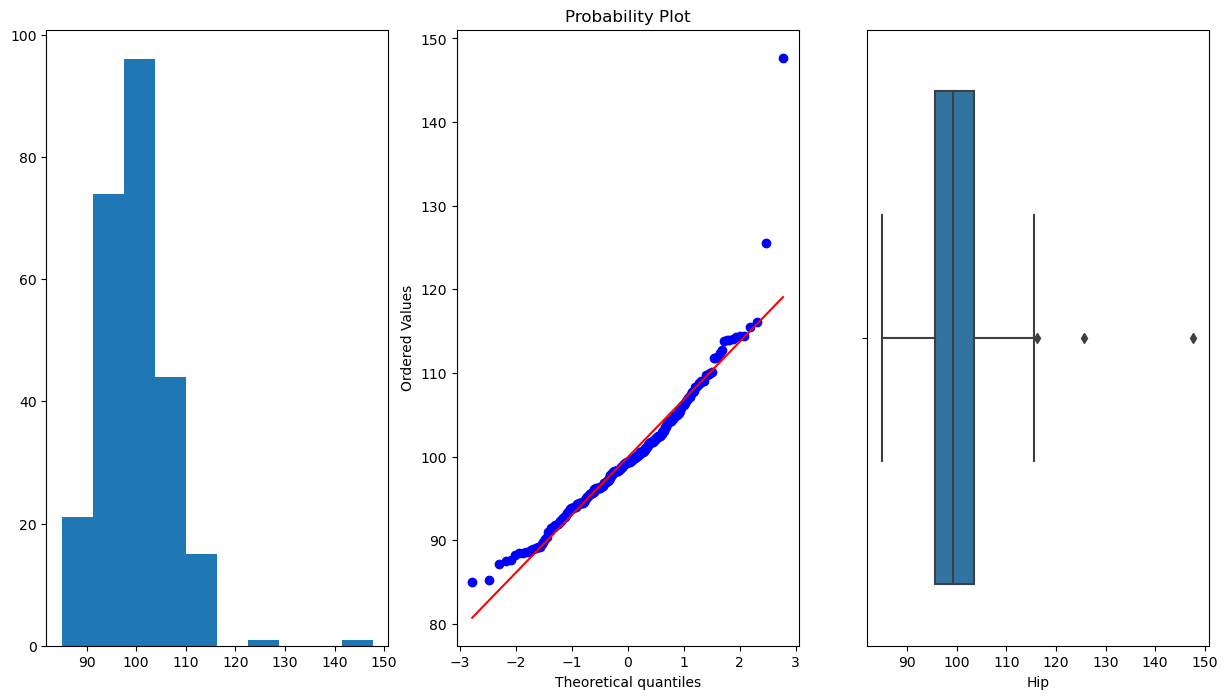

Distribution plots for the feature Thigh


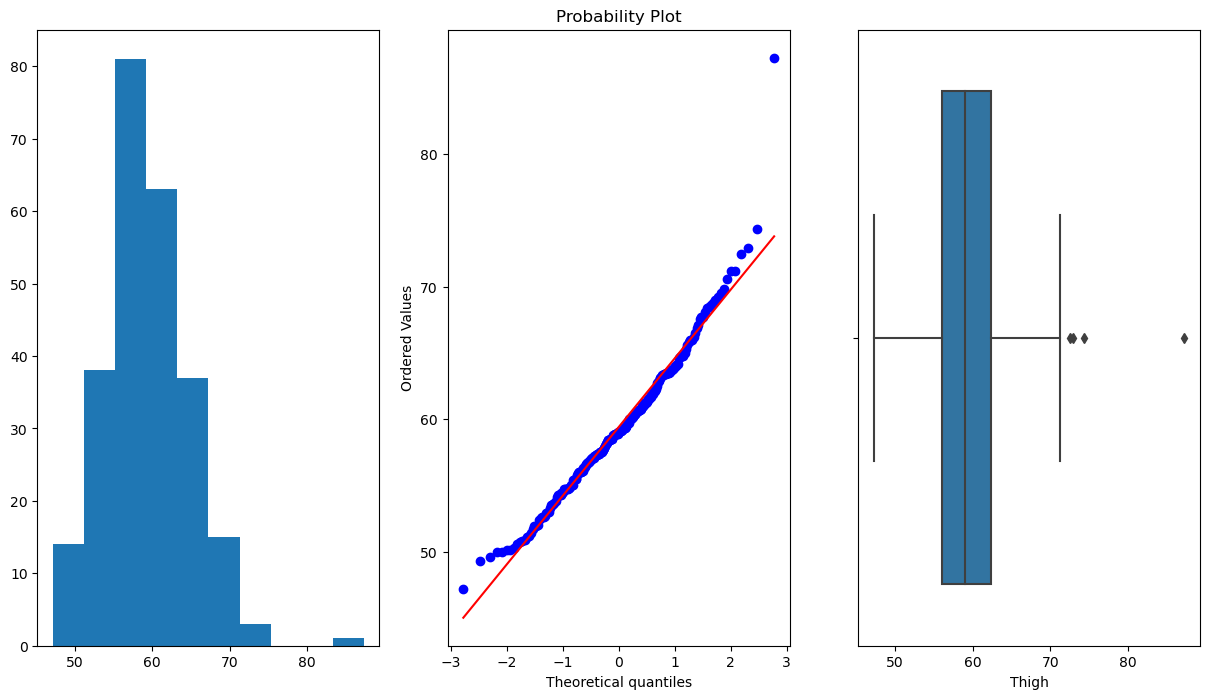

Distribution plots for the feature Knee


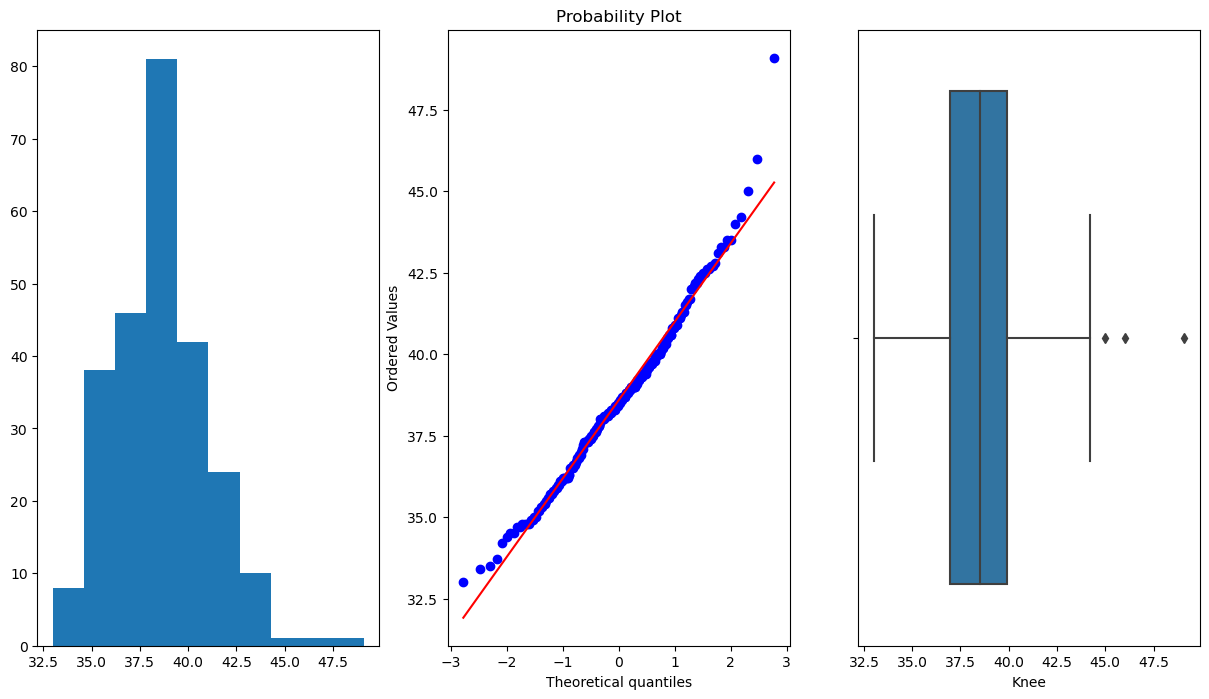

Distribution plots for the feature Ankle


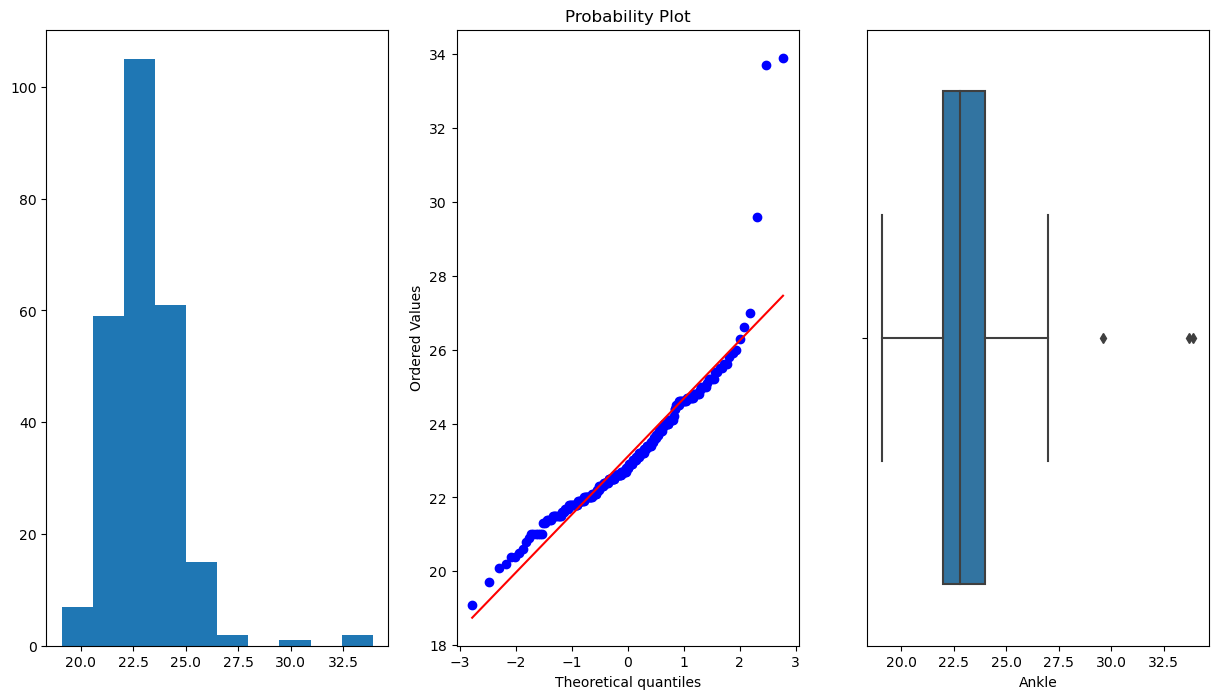

Distribution plots for the feature Biceps


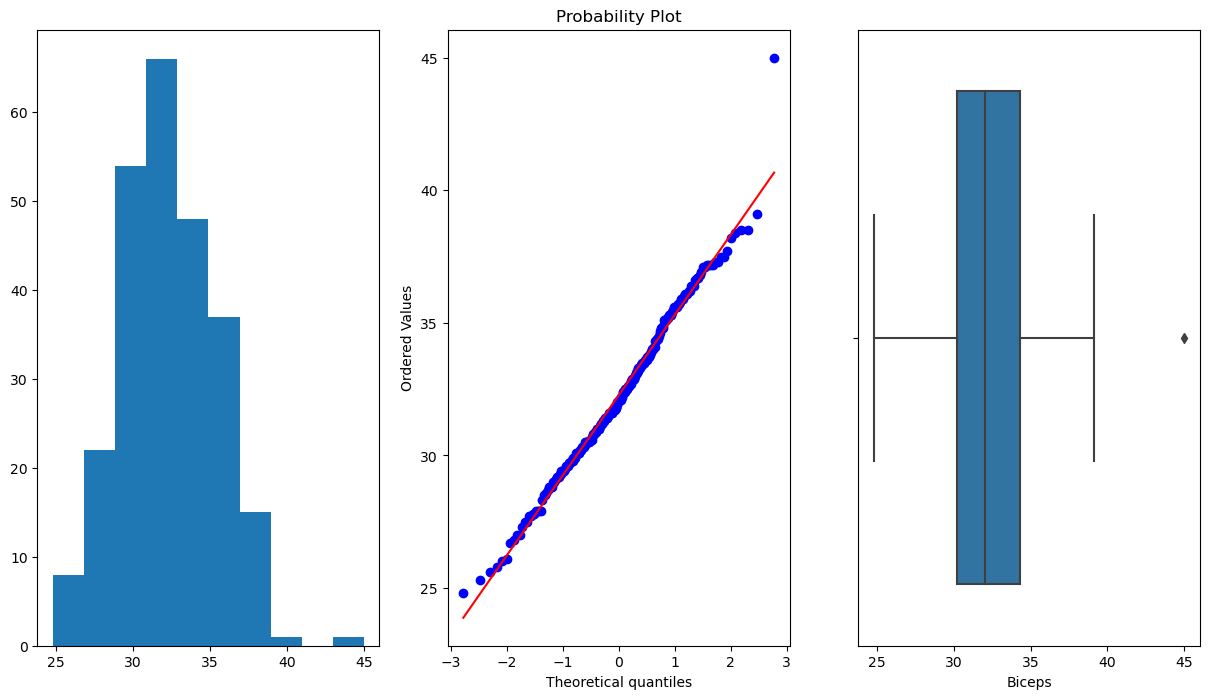

Distribution plots for the feature Forearm


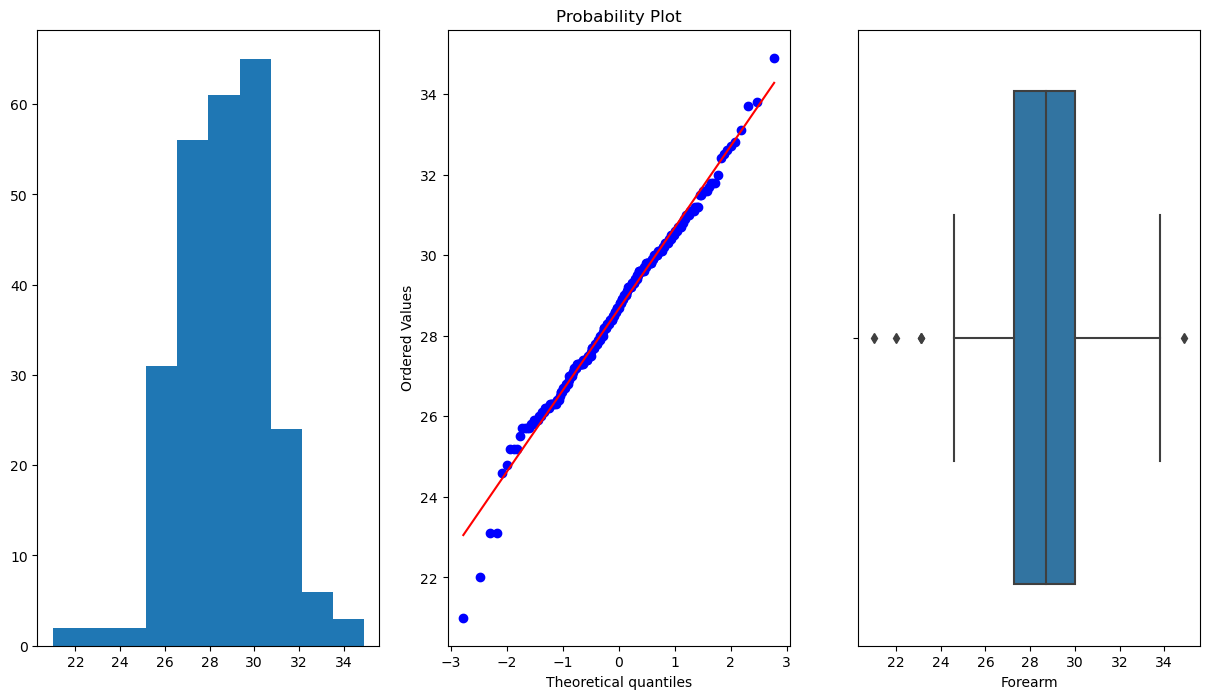

Distribution plots for the feature Wrist


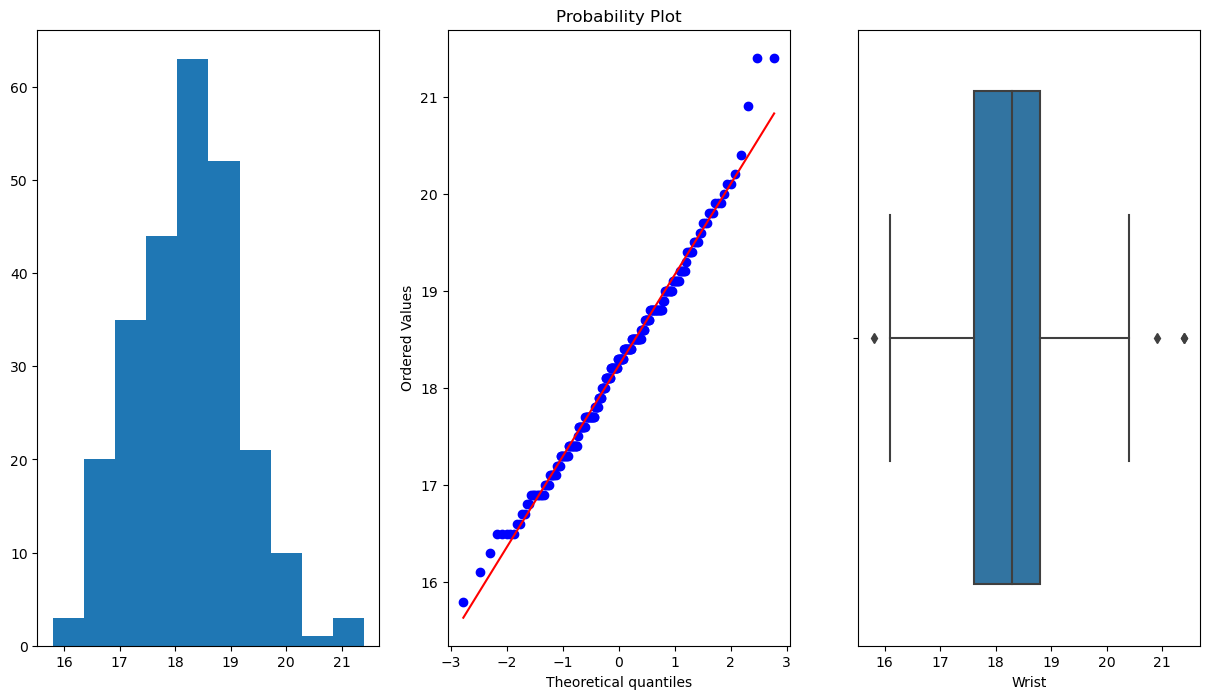

In [9]:
def plots(df,col):
    plt.figure(figsize=(15,8))
    plt.subplot(1,3,1)
    plt.hist(df[col])
    
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist='norm', plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(x=df[col])
    plt.show()
    
    
cols = list(df.columns)
for i in range(len(cols)):
    print(f"Distribution plots for the feature {cols[i]}")
    
    plots(df,cols[i])
    

In [10]:
upperlimit=[]
lowerlimit=[]

for i in df.columns:
    upperlimit.append(df[i].mean()+(df[i].std())*4)
    lowerlimit.append(df[i].mean()-(df[i].std())*4)
    

In [11]:
cols = list(df.columns)
j=0
for i in range(len(cols)):
    outliers = df.loc[(df[cols[i]]>upperlimit[j])&(df[cols[i]]<lowerlimit[j])]
    j+=1

In [12]:
outliers

Empty DataFrame
Columns: [Density, BodyFat, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist]
Index: []

In [13]:
train_data = df.drop('BodyFat', axis=1)

In [14]:
test_data = df['BodyFat']

### Using ExtraTreesRegressor for feature selection

In [15]:
etr = ExtraTreesRegressor()
etr.fit(train_data,test_data)

ExtraTreesRegressor()

In [16]:
etr.feature_importances_

array([7.52726136e-01, 2.07109640e-03, 1.34561888e-02, 2.63709137e-03,
       5.06479168e-03, 6.03851648e-02, 1.30206093e-01, 5.15695985e-03,
       9.30762647e-03, 8.32627970e-03, 6.43773587e-04, 7.10788392e-03,
       8.49794065e-04, 2.06112007e-03])

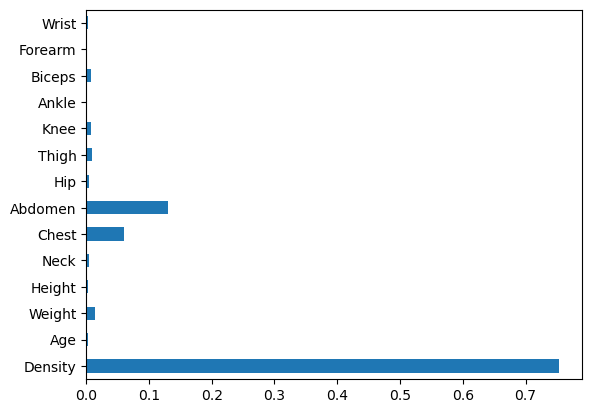

In [17]:
series = pd.Series(etr.feature_importances_, index = train_data.columns)
series.plot(kind='barh')

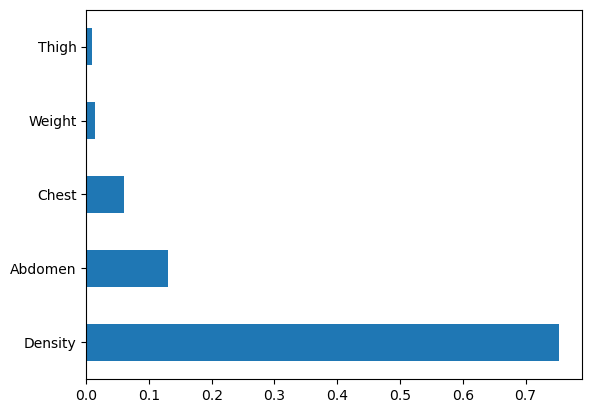

In [18]:
series = pd.Series(etr.feature_importances_, index = train_data.columns)
series.nlargest(5).plot(kind='barh')

### Using Mutual Information Gain for feature selection

In [19]:
mr = mutual_info_regression(train_data, test_data)

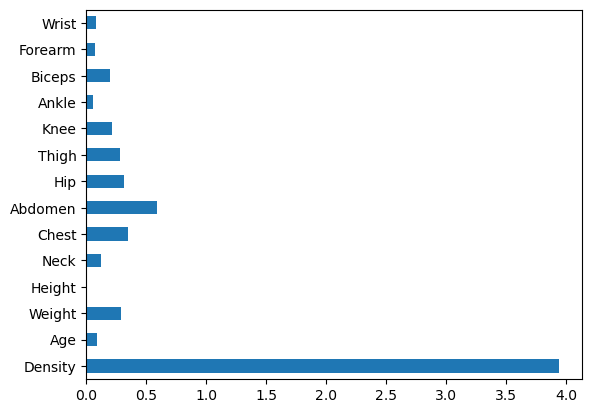

In [20]:
plotdata_mi = pd.Series(mr, index=train_data.columns)
plotdata_mi.plot(kind='barh')

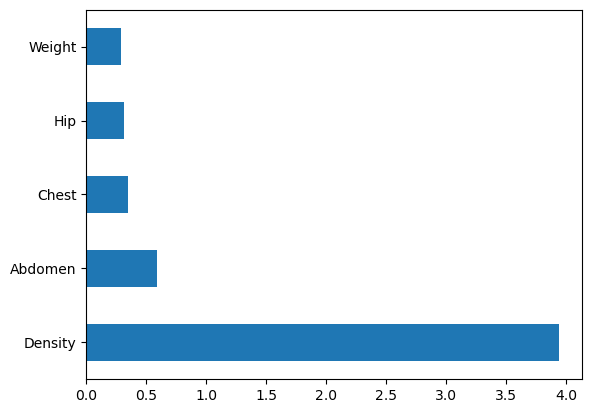

In [21]:
plotdata_mi = pd.Series(mr, index=train_data.columns)
plotdata_mi.nlargest(5).plot(kind='barh')

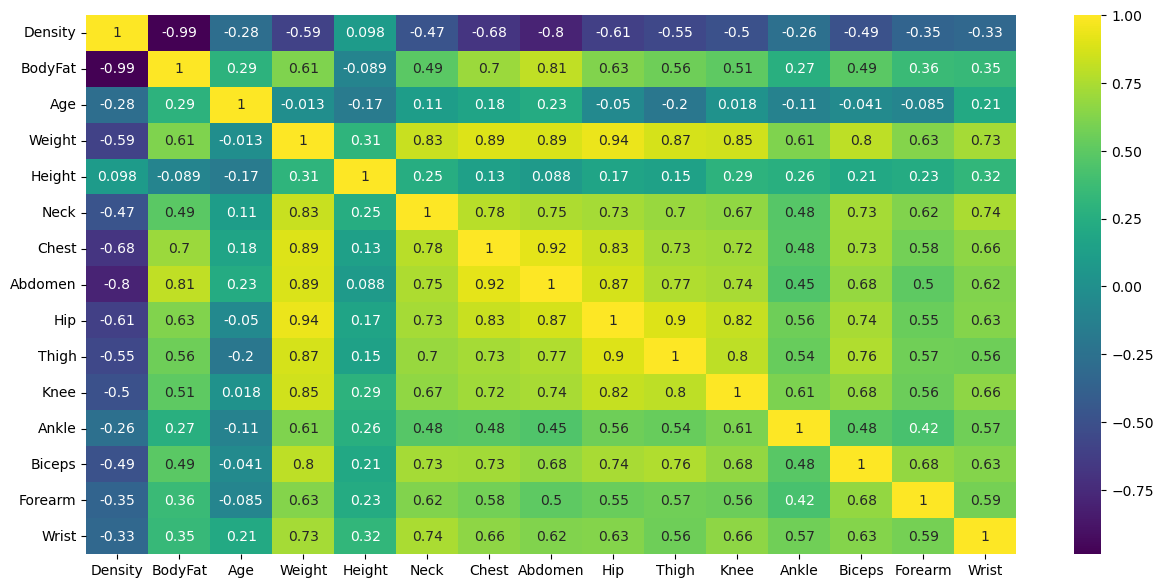

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [23]:
def correlation(df, threshold):
    colcor = set()
    cormat = df.corr()
    for i in range(len(cormat)):
        for j in range(i):
            if abs(cormat.iloc[i][j])>threshold:
                colname = cormat.columns[i]
                colcor.add(colname)
                
    return colcor

correlation(train_data, threshold=0.85)

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

###### From the above feature selection tehniques, the features recommended by the ExtraTreesRegressor and mutual informatio gain are correct and from the correlation map we get the similar pattern. We noticed that Abdomen and Hip are having similar features. They're having a collinearity, same goes with the knee and thigh, we can either keep any one of them and we noticed that the feature Abdomen gave more feature importance score in comparison to Hip, so will be selecting that.

In [24]:
temp = df[list(df.columns)]

In [25]:
info = pd.DataFrame()
info['VIF'] = [variance_inflation_factor(temp.values, i ) for i in range(temp.shape[1])]
info['Column'] = temp.columns
info

VIF   Column
0   3695.622377  Density
1     33.845429  BodyFat
2     31.376101      Age
3   1238.097164   Weight
4    613.410514   Height
5   1081.965633     Neck
6   1374.457425    Chest
7   1332.624257  Abdomen
8   2933.636131      Hip
9   1017.257501    Thigh
10  1187.890413     Knee
11   356.293529    Ankle
12   419.391664   Biceps
13   454.571766  Forearm
14  1349.973920    Wrist

###### We'll go with the weight and hip method as Hip and Thigh are very much related, so we'll select the Density, Abdomen, Chest, Hip, Weight features and drop every ohter feature, if that doesn't produce any further importance we will try with some other feature

In [26]:
df

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

In [27]:
df_train = df[['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']]

In [28]:
df_train

Density  Abdomen  Chest    Hip  Weight
0     1.0708     85.2   93.1   94.5  154.25
1     1.0853     83.0   93.6   98.7  173.25
2     1.0414     87.9   95.8   99.2  154.00
3     1.0751     86.4  101.8  101.2  184.75
4     1.0340    100.0   97.3  101.9  184.25
..       ...      ...    ...    ...     ...
247   1.0736     83.6   89.2   88.8  134.25
248   1.0236    105.0  108.5  104.5  201.00
249   1.0328    111.5  111.1  101.7  186.75
250   1.0399    101.3  108.3   97.8  190.75
251   1.0271    108.5  112.4  107.1  207.50

[252 rows x 5 columns]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_train,test_data, test_size=0.2)

In [30]:
X_train.shape

(201, 5)

In [31]:
X_test.shape

(51, 5)

In [32]:
dtr = DecisionTreeRegressor()

In [33]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

[Text(0.4990418632075472, 0.9583333333333334, 'X[0] <= 1.056\nsquared_error = 67.838\nsamples = 201\nvalue = 19.044'),
 Text(0.2202240566037736, 0.875, 'X[0] <= 1.039\nsquared_error = 21.849\nsamples = 105\nvalue = 25.533'),
 Text(0.09345518867924528, 0.7916666666666666, 'X[0] <= 1.029\nsquared_error = 9.303\nsamples = 41\nvalue = 30.432'),
 Text(0.04363207547169811, 0.7083333333333334, 'X[0] <= 1.014\nsquared_error = 4.306\nsamples = 17\nvalue = 33.488'),
 Text(0.03891509433962264, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 40.1'),
 Text(0.04834905660377359, 0.625, 'X[0] <= 1.024\nsquared_error = 1.672\nsamples = 16\nvalue = 33.075'),
 Text(0.02122641509433962, 0.5416666666666666, 'X[2] <= 117.25\nsquared_error = 0.276\nsamples = 6\nvalue = 34.567'),
 Text(0.009433962264150943, 0.4583333333333333, 'X[3] <= 108.2\nsquared_error = 0.122\nsamples = 2\nvalue = 33.95'),
 Text(0.0047169811320754715, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 33.6'),
 Text(0.014150943396226415,

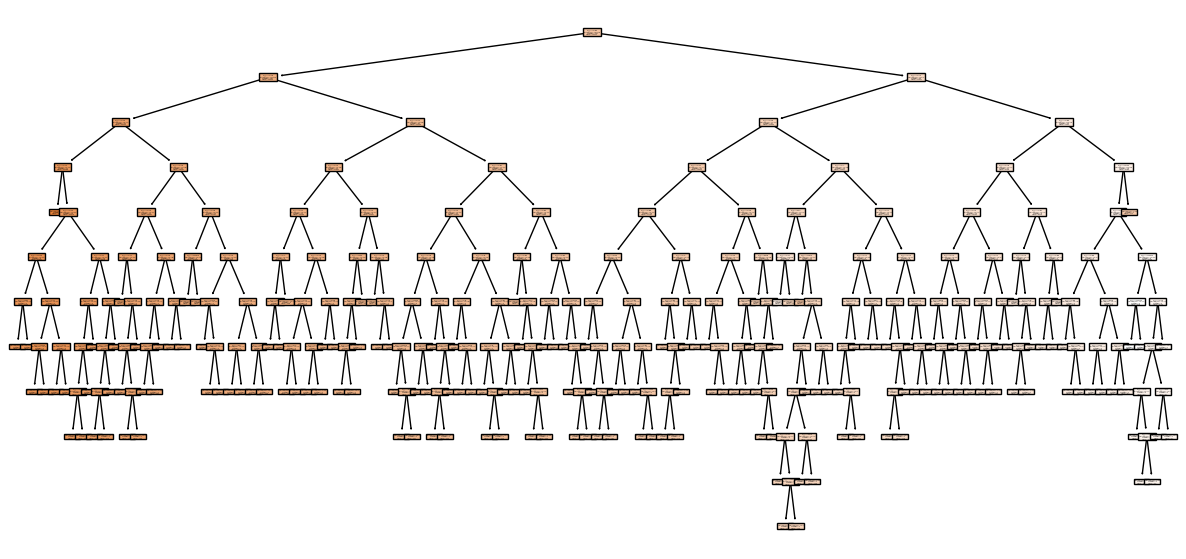

In [34]:
plt.figure(figsize=(15,7))
tree.plot_tree(dtr, filled=True)

In [35]:
path = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [36]:
alphalist = []
for i in range(len(ccp_alpha)):
    dtr = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    dtr.fit(X_train, y_train)
    alphalist.append(dtr)

In [37]:
train_score = [alphalist[i].score(X_train, y_train) for i in range(len(alphalist))]
test_score = [alphalist[i].score(X_test, y_test) for i in range(len(alphalist))]

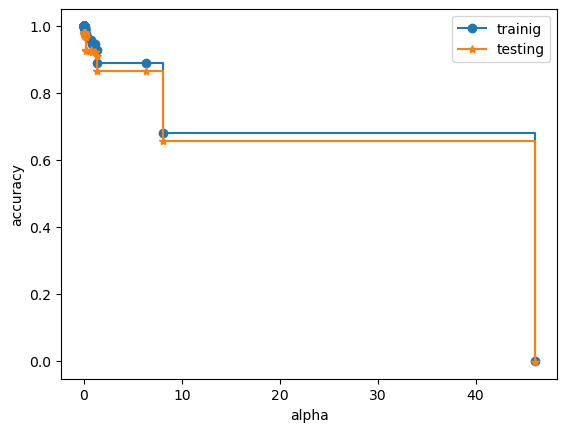

In [38]:
plt.plot(ccp_alpha, train_score, marker='o', label='trainig', drawstyle='steps-post')
plt.plot(ccp_alpha, test_score, marker='*', label='testing', drawstyle='steps-post')
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [39]:
dtr_1 = DecisionTreeRegressor(ccp_alpha=1)
dtr_1.fit(X_train, y_train)
y_pred = dtr_1.predict(X_test)
print(f'Decision Tree : {metrics.r2_score(y_test, y_pred)}')

Decision Tree : 0.921824877075662


In [40]:
rf = RandomForestRegressor(n_estimators=1000, ccp_alpha=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest : {metrics.r2_score(y_test, y_pred_rf)}')

Random Forest : 0.9355439417209992


### Hyperparameter Tuning

In [41]:
params = {
    'RandomForest': {
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1, stop=1200,num=100)],
#             'criterion': ['squared_error','mae'],
            'max_depth': [int(x) for x in np.linspace(start=1, stop=30,num=5)],
            'min_samples_split': [2,5,10,12],
            'min_samples_leaf': [2,5,10,12],
            'max_features':['sqrt'],
            'ccp_alpha': [1,2,2.5,3,3.5,4.5],
        } 
    },
    
    'Decision-Tree': {
        'model':DecisionTreeRegressor(),
        'params':{
#             'criterion': ['squared_error','mae'],
            'splitter':['best','random'],
            'min_samples_split': [2,5,10,12,15],
            'min_samples_leaf': [2,5,10,12,15],
            'max_features':['sqrt'],
            'ccp_alpha': [1,2,2.5,3,3.5,4.5],
        } 
    },
    
    'SVM':{
        'model': SVR(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear', 'poly', 'rbf','sigmoid'],
            'max_iter': [int(x) for x in np.linspace(start=1, stop=250,num=10)],
        }
    }
}

In [42]:
scores=[]
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'], param_distributions=mp['params'],
                            cv=5, n_jobs=-1,n_iter=10, scoring='neg_mean_squared_error')
    
    clf.fit(X_train, y_train)
    scores.append({
        'modelname':modelname,
        'bestscore':clf.best_score_,
        'bestestimator':clf.best_estimator_
    })

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=194).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [43]:
scores_df = pd.DataFrame(scores, columns=['modelname', 'bestscore', 'bestestimator'])
scores_df

modelname  bestscore                                      bestestimator
0   RandomForest  -5.318473  (DecisionTreeRegressor(ccp_alpha=1, max_depth=...
1  Decision-Tree -10.292179  DecisionTreeRegressor(ccp_alpha=1, max_feature...
2            SVM -28.821049  SVR(C=0.5, kernel='poly', max_iter=194, tol=0....

In [44]:
scores[0]['bestestimator']

RandomForestRegressor(ccp_alpha=1, max_depth=22, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=655)

In [45]:
rf1 = scores[0]['bestestimator']


In [46]:
rf1.fit(X_train, y_train)


RandomForestRegressor(ccp_alpha=1, max_depth=22, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=655)

In [47]:
y_pred_rf1 = rf1.predict(X_test)

In [48]:
metrics.r2_score(y_test, y_pred_rf1)

0.9077762611918146

In [49]:
df_train_list = np.array(df_train)
predicted = []
for i in range(len(df_train_list)):
    predicted.append(rf1.predict([df_train_list[i]]))

df_train['Actual Result']=test_data
df_train['Predicted Result']=np.array(predicted)
    

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

In [50]:
df_train

Density  Abdomen  Chest    Hip  Weight  Actual Result  Predicted Result
0     1.0708     85.2   93.1   94.5  154.25           12.3         12.155106
1     1.0853     83.0   93.6   98.7  173.25            6.1          8.494415
2     1.0414     87.9   95.8   99.2  154.00           25.3         23.138149
3     1.0751     86.4  101.8  101.2  184.75           10.4         11.301296
4     1.0340    100.0   97.3  101.9  184.25           28.7         27.326610
..       ...      ...    ...    ...     ...            ...               ...
247   1.0736     83.6   89.2   88.8  134.25           11.0         10.617633
248   1.0236    105.0  108.5  104.5  201.00           33.6         30.282122
249   1.0328    111.5  111.1  101.7  186.75           29.3         29.114252
250   1.0399    101.3  108.3   97.8  190.75           26.0         26.023274
251   1.0271    108.5  112.4  107.1  207.50           31.9         30.557028

[252 rows x 7 columns]

C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\2884055517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Actual Result'],label='Actual Result', hist=False)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\2884055517.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

[]

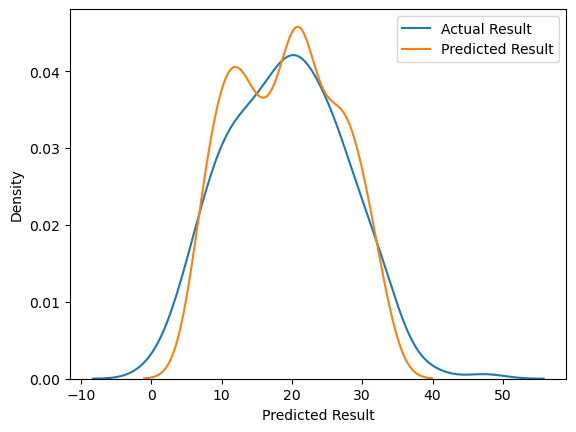

In [51]:
sns.distplot(df_train['Actual Result'],label='Actual Result', hist=False)
sns.distplot(df_train['Predicted Result'],label='Predicted Result', hist=False)
plt.legend()
plt.plot()

In [52]:
rf = RandomForestRegressor(n_estimators=1000, ccp_alpha=1)


In [53]:
rf.fit(X_train, y_train)


RandomForestRegressor(ccp_alpha=1, n_estimators=1000)

In [54]:
y_pred_rf = rf.predict(X_test)

In [55]:
metrics.r2_score(y_test, y_pred_rf)

0.9362523009156222

In [56]:
df_train.drop(['Actual Result','Predicted Result'], axis=1, inplace=True)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\1232749926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Actual Result','Predicted Result'], axis=1, inplace=True)


In [57]:
df_train_list = np.array(df_train)
predicted = []
for i in range(len(df_train_list)):
    predicted.append(rf1.predict([df_train_list[i]]))

df_train['Actual Result']=test_data
df_train['Predicted Result']=np.array(predicted)
    

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:

In [58]:
df_train

Density  Abdomen  Chest    Hip  Weight  Actual Result  Predicted Result
0     1.0708     85.2   93.1   94.5  154.25           12.3         12.155106
1     1.0853     83.0   93.6   98.7  173.25            6.1          8.494415
2     1.0414     87.9   95.8   99.2  154.00           25.3         23.138149
3     1.0751     86.4  101.8  101.2  184.75           10.4         11.301296
4     1.0340    100.0   97.3  101.9  184.25           28.7         27.326610
..       ...      ...    ...    ...     ...            ...               ...
247   1.0736     83.6   89.2   88.8  134.25           11.0         10.617633
248   1.0236    105.0  108.5  104.5  201.00           33.6         30.282122
249   1.0328    111.5  111.1  101.7  186.75           29.3         29.114252
250   1.0399    101.3  108.3   97.8  190.75           26.0         26.023274
251   1.0271    108.5  112.4  107.1  207.50           31.9         30.557028

[252 rows x 7 columns]

C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\2884055517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Actual Result'],label='Actual Result', hist=False)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10880\2884055517.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

[]

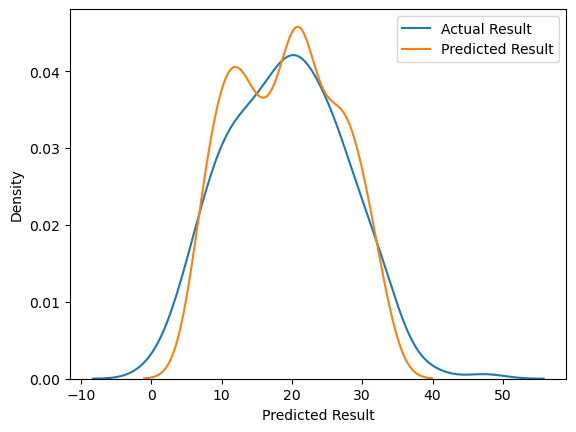

In [59]:
sns.distplot(df_train['Actual Result'],label='Actual Result', hist=False)
sns.distplot(df_train['Predicted Result'],label='Predicted Result', hist=False)
plt.legend()
plt.plot()

##### As we can see the normal aaproach Random Forest performs well then the Random Forest model with hyperparameter tuning. So we will be using a normal approach Random Forest model as it predict close to the actual values.

In [63]:
#Saving model
file=open('bodyfatmodel.pkl','wb')
pickle.dump(rf,file)
file.close()
